<div class="alert alert-block alert-info">
<b>1)</b> Se busca realizar una librería en Python que nos permita obtener $N$ muestras de las siguientes señales de período $T_0=1/f_0$, muestreadas a una frecuencia $f_s$ :

</div>


+ **Senoidal**

> $s(k)=A_0.sin(2\pi.k.\frac{ f_0}{f_s} + \phi_0),\space\space \forall k \in \Bbb{R} \wedge k \in (0, N-1)$

+ __Ruido__ incorrelado de distribución Gaussiana y parámetros $\mu$ y $\sigma^2$

***

+ (Opcional) __Cuadrada__ con ciclo de actividad $d \in (0,1)$

> $s(k)=A_0,\space\space \forall k \in (0, N.d ]$ 

> $s(k)=-A_0,\space \forall k \in (N.d, N-1)$

+ (Opcional) __Triangular__ con punto de simetría $d \in (0,1)$ y coeficientes $a_{ij} \in \Bbb{R}$

> $s(k)=a_{11}.k/f_s+a_{12},\space\space \forall k \in (0, N.d ]$ 

> $s(k)=a_{21}.k/f_s+a_{22},\space \forall k \in (N.d, N-1)$


Es decir que se podría invocar la señal que genere la senoidal de la siguiente manera:


In [2]:

def generador_senoidal (fs, f0, N, a0=1, p0=0):
    """ 
    
    brief:  Generador de señales senoidal, con argumentos
    
    fs:     frecuencia de muestreo de la señal [Hz]
    N:      cantidad de muestras de la señal a generar
    f0:     frecuencia de la senoidal [Hz]
    a0:     amplitud pico de la señal [V]
    p0:     fase de la señal sinusoidal [rad]
    
    como resultado la señal devuelve:
    
    signal: senoidal evaluada en cada instante 
    tt:     base de tiempo de la señal
    """  
    ts = 1/fs # tiempo de muestreo
    tt = np.linspace(0, (N-1)*ts, N).flatten()
        
    # comienzo de la función
    
    signal = a0 * np.sin (2*np.pi*f0*tt+p0)
    
    
    # fin de la función
    
       
    return tt, signal




a) Genere las gráficas asociadas a las siguientes señales de ejemplo para corroborar el correcto funcionamiento de las funciones. Para la presentación de las mismas, tome como referencia la presentación de la siguiente señal respecto a:

* etiquetas indicando cada eje con sus respectivas unidades
* leyendas indicando cada trazo o color qué representa
* título de la figura que explique lo que se pretende visualizar


<img src="./fig_ejemplo.svg" align="center" width="100%" /> 
<img src="./fig_ejemplo2.svg" align="center" width="70%" /> 

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Insertar aquí el código para inicializar tu notebook
########################################################

import scipy

In [4]:
# NO modifiques este bloque
############################

N  = 1000 # muestras
fs = 1000 # Hz


Text(0.5, 1.0, 'Signal(t)')

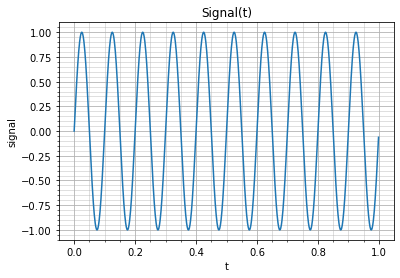

In [37]:
##################
# a.1) Senoidal #
#################

a0 = 1 # Volts
p0 = 0 # radianes
f0 = 10   # Hz

# Insertar aquí el código para generar y visualizar la señal
##############################################################
tt,signal = generador_senoidal (fs, f0, N, a0, p0)

plt.figure(1)
plt.minorticks_on()
plt.grid(True,'minor',alpha=0.5)
plt.grid(True)
plt.plot(tt,signal)
plt.xlabel('t')
plt.ylabel('signal')
plt.title("Signal(t)")



¿Podría inferir la frecuencia de la senoidal a.1 a partir de su representación temporal?


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Si, se puede observar que en un tiempo de 1 segundo se representan 10 ciclos completos por lo tanto se podría inferir que la frecuencia es 10Hz.
</div>

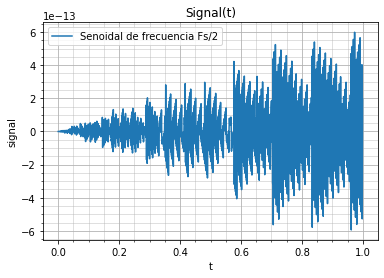

In [39]:
##################
# a.2) Senoidal #
#################

a0 = 1 # Volts
p0 = 0 # radianes
f0 = fs/2   # Hz

# Insertar aquí el código para generar y visualizar la señal
##############################################################
tt,signal = generador_senoidal (fs, f0, N, a0, p0)

plt.figure(1)
plt.minorticks_on()
plt.grid(True,'minor',alpha=0.5)
plt.grid(True)
plt.plot(tt,signal,label="Senoidal de frecuencia Fs/2")
plt.xlabel('t')
plt.ylabel('signal')
plt.title("Signal(t)")
plt.legend()


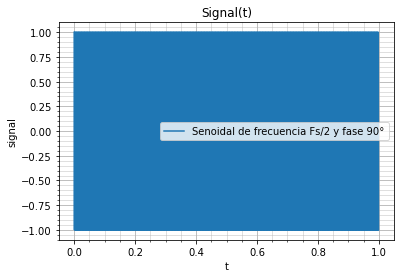

In [40]:
##################
# a.3) Senoidal #
#################

a0 = 1       # Volts
p0 = np.pi/2 # radianes
f0 = fs/2    # Hz

# Insertar aquí el código para generar y visualizar la señal
##############################################################
tt,signal = generador_senoidal (fs, f0, N, a0, p0)

plt.figure(1)
plt.minorticks_on()
plt.grid(True,'minor',alpha=0.5)
plt.grid(True)
plt.plot(tt,signal,label="Senoidal de frecuencia Fs/2 y fase 90°")
plt.xlabel('t')
plt.ylabel('signal')
plt.title("Signal(t)")
plt.legend()



¿Y para los casos **a.2** y **a.3** podría conocer los parámetros de la senoidal?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> El los casos a2 y a3 no es posible reconocer los parámetros de la señal representada. Si no se supiese a priori que estamos analizando una señal senoidal, nunca podriamos deducirlo con estas representaciones.
</div>

¿A qué se debe?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Se debe a que la frecuencia de la señal que se quiere representar tiene una frecuencia equivalente a la de Nyquist (Fs/2), por lo tanto la tasa de muestreo utilizada (Fs) no es suficiente para obtener una representación temporal adecuada. Observese que en a2 la representación es casi nula debido a que se muetrea siempre en los cruces por cero de la señal senoidal. En el caso de a3, se observa que la señal representada  tiene una amplitud pico coincidente con la de la senoidal real, y eso se debe a que está desfasada 90°, con lo cual se muestrea siempre en los picos.
</div>

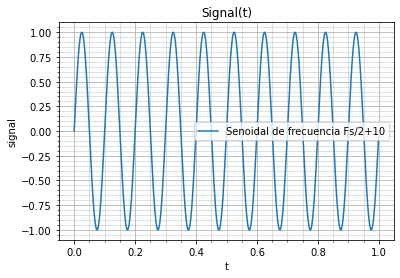

In [41]:
##################
# a.4) Senoidal #
#################

a0 = 1     # Volts
p0 = 0     # radianes
f0 = fs+10 # Hz

tt,signal = generador_senoidal (fs, f0, N, a0, p0)

plt.figure(1)
plt.minorticks_on()
plt.grid(True,'minor',alpha=0.5)
plt.grid(True)
plt.plot(tt,signal,label="Senoidal de frecuencia Fs/2+10")
plt.xlabel('t')
plt.ylabel('signal')
plt.title("Signal(t)")
plt.legend()


# Insertar aquí el código para generar y visualizar la señal
##############################################################


¿Es posible diferenciar **a.1** de **a.4** a partir de las gráficas?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Las representaciones de a1 y a4 son idénticas, no es posible diferenciarlas.
</div>

¿En caso que no, qué solución podría implementar para evitar dicha ambigüedad?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Lo que se manifiesta en este caso es el afecto de Aliasing, es decir que las componentes de frecuencia mayor a Fs/2 se ven representadas en forma "espejada" respecto de dicho eje. En este caso un señal de 10 Hz y una de 1010Hz tienen la misma represetación temporal. para evitar este problema se debe asegurar que las señales que seran muetreadas estarán limitadas en banda a un máximo de Fs/2.
</div>

<div class="alert alert-block alert-info">
<b>2.a)</b> (Opcional) Implemente un algoritmo que calcule la transformada discreta de Fourier (DFT). Utilice las funciones generadoras de señales de 1) para evaluar y ejemplificar su funcionamiento.
</div>

<div class="alert alert-block alert-info">
<b>2.b)</b> (Opcional) Compare el tiempo de ejecución de la DFT implementada en con la **FFT** (implementada en **scipy.signal**) en función del tamaño de la señal N. Grafique el tiempo de ejecución de ambos casos en función de N.
</div>

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Utilice el módulo **timeit** para medir el tiempo transcurrido.
</div>

In [9]:
import timeit

the_start = timeit.timeit()
print("hello")
the_end = timeit.timeit()
print(the_start - the_end)


hello
-0.006773660000000348


<div class="alert alert-block alert-danger">
<b>¡Atención!:</b> Completá la siguiente tabla. Podés guardar tus resultados en la lista **tus_resultados**.
</div>

In [10]:
from pandas import DataFrame
from IPython.display import HTML

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ ['--'], 
                   [''], # <-- acá debería haber numeritos :)
                   [''], # <-- acá debería haber numeritos :)
                   [''], # <-- acá debería haber numeritos :)
                   [''], # <-- acá debería haber numeritos :)
                   [''], # <-- acá debería haber numeritos :)
                   [''], # <-- acá debería haber numeritos :)
                   [''], # <-- acá debería haber numeritos :)
                   ['']  # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['tiempo transcurrido (s)'],
               index=['Tamaño de la señal N', 
                      16, 
                      32, 
                      64, 
                      128,
                      256,
                      512,
                      1024,
                      2048
                     ])
HTML(df.to_html())


,tiempo transcurrido (s)
Tamaño de la señal N,--
16,
32,
64,
128,
256,
512,
1024,
2048,


<div class="alert alert-block alert-info">
<b>3.a)</b> Verifique el efecto del leakage para una senoidal de $f_0 = f_S/4 + f_D$ siendo $f_D = (0.01,\, 0.25,\, 0.5)$, es decir una frecuencia de desintonía respecto al bin $f_S/4$.
</div>

<div class="alert alert-block alert-danger">
<b>¡Atención!:</b> Completá la siguiente tabla. Podés guardar tus resultados en la lista **tus_resultados**.
</div>

In [11]:
#######################################
# Tu simulación que genere resultados #
#######################################

fs = 1000
N  = 1000
a0 = 1
p0 = 0
df = fs/N # resolución espectral
f0 = (N/4*df)
dt = 1/fs

def AnalizadorLeakage(desintonia):
    
    tt,y = generador_senoidal (fs, f0+desintonia, N, a0, p0)
 
    
    #FFT
    fft=np.fft.fft (y)
    fftMod = np.abs(fft)
 
    PotTotal = 0
    
    for n in range(0, int(fs/2)):
        PotTotal += fftMod[n]**2
        
    PotSinFo = (PotTotal - fftMod[int(f0)]**2)/N # Resto |X(f0)|^2 y normalizo por la cantidad de muestras
 
    return [fftMod[int(f0)]/N , fftMod[int(f0)+1]/N , PotSinFo]    

tus_resultados = [ ['$ \lvert X(f_0) \lvert$', '$ \lvert X(f_0+1) \lvert $', '$\sum_{i=F} \lvert X(f_i) \lvert ^2 $'], 
                   ['',                        '',                           '$F:f \neq f_0$'], 
                  AnalizadorLeakage(0), # <-- acá debería haber numeritos :)
                  AnalizadorLeakage(0.01), # <-- acá debería haber numeritos :)
                  AnalizadorLeakage(0.25), # <-- acá debería haber numeritos :)
                  AnalizadorLeakage(0.5)  # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['Frecuencia central', 'Primer adyacente', 'Resto de frecuencias'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '$f_S/4$', 
                      '$f_S/4+0.01$', 
                      '$f_S/4+0.25$', 
                      '$f_S/4+0.5$'])
HTML(df.to_html())


,Frecuencia central,Primer adyacente,Resto de frecuencias
$f_0$ \ expr. matemática,$ \lvert X(f_0) \lvert$,$ \lvert X(f_0+1) \lvert $,$\sum_{i=F} \lvert X(f_i) \lvert ^2 $
,,,$F:f \neq f_0$
$f_S/4$,0.5,1.01162e-14,0
$f_S/4+0.01$,0.499917,0.00505069,0.0822358
$f_S/4+0.25$,0.449805,0.150406,47.4253
$f_S/4+0.5$,0.318309,0.318312,148.679


<div class="alert alert-block alert-info">
<b>3.b)</b> Verifique qué ocurre si a la señal de $f_0 = f_S/4 + 0.5$ se le agregan ceros para prolongar su duración. Es decir si la señal tiene N muestras, agregue $M_j$ ceros siendo $M_j = ( \frac{N}{10},\, N,\, 10N)$.
</div>

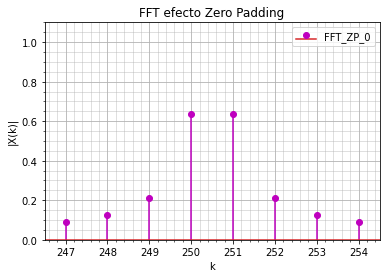

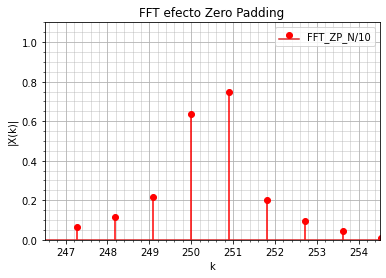

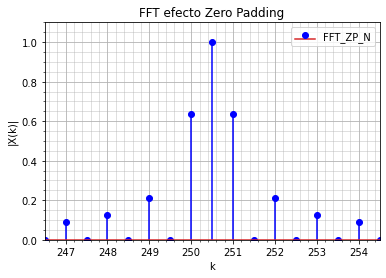

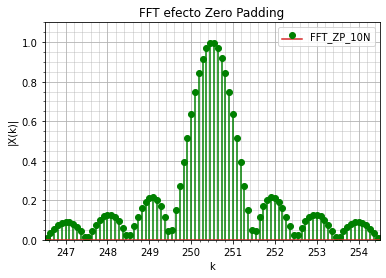

In [12]:
fs = 1000
N  = 1000
a0 = 1
p0 = 0
desintonia = 0.5 #Desintonia
df = fs/N # resolución espectral
f0 = (N/4*df)
dt = 1/fs

def AnalizadorZeroPadding (signal, Mceros):

    y_pad = np.pad( signal, (0,int(Mceros)),'constant') #Completo la senial con Mceros
    
    fft=scipy.fft.fft (y_pad)
    fftMod = np.abs(fft)
    
    ff = np.arange(0,N,df*N/(N+Mceros)) 
    
    return ff, fftMod*2/N #Devuelvo eje de frecuencias y Modulo FFTNormalizados
    
tt,y = generador_senoidal (fs, f0+desintonia, N, a0, p0)



ff0, fftzpM0 = AnalizadorZeroPadding (y, 0)
bfrec0 = ff0 <= fs/2

ff01, fftzpM01 = AnalizadorZeroPadding (y, N/10)
bfrec01 = ff01 <= fs/2

ff1, fftzpM1 = AnalizadorZeroPadding (y, N)
bfrec1 = ff1 <= fs/2

ff10, fftzpM10 = AnalizadorZeroPadding (y, 10*N)
bfrec10 = ff10 <= fs/2


plt.figure(1)
plt.axis([246.5,254.5,0,1.1])
plt.minorticks_on()
plt.grid(True,'minor',alpha=0.5)
plt.grid(True)
plt.stem(ff0[bfrec0], fftzpM0[bfrec0], 'm','mo', label='FFT_ZP_0',use_line_collection=True)  # etc.
plt.xlabel('k')
plt.ylabel('|X(k)|')
plt.title("FFT efecto Zero Padding")
plt.legend()

plt.figure(2)
plt.axis([246.5,254.5,0,1.1])
plt.minorticks_on()
plt.grid(True,'minor',alpha=0.5)
plt.grid(True)
plt.stem(ff01[bfrec01], fftzpM01[bfrec01], 'r','ro', label='FFT_ZP_N/10',use_line_collection=True)  # etc.
plt.xlabel('k')
plt.ylabel('|X(k)|')
plt.title("FFT efecto Zero Padding")
plt.legend()

plt.figure(3)
plt.axis([246.5,254.5,0,1.1])
plt.minorticks_on()
plt.grid(True,'minor',alpha=0.5)
plt.grid(True)
plt.stem(ff1[bfrec1], fftzpM1[bfrec1], 'b','bo', label='FFT_ZP_N',use_line_collection=True) 
plt.xlabel('k')
plt.ylabel('|X(k)|')
plt.title("FFT efecto Zero Padding")
plt.legend()

plt.figure(4)
plt.axis([246.5,254.5,0,1.1])
plt.minorticks_on()
plt.grid(True,'minor',alpha=0.5)
plt.grid(True)
plt.stem(ff10[bfrec10], fftzpM10[bfrec10], 'g','go', label='FFT_ZP_10N',use_line_collection=True) 
plt.xlabel('k')
plt.ylabel('|X(k)|')
plt.title("FFT efecto Zero Padding")
plt.legend()

**3.c)** ¿Ha variado la resolución espectral en los casos de 3.b?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> La resolución espectral aumenta conforme se agregan mas ceros al final del vector termporal de la señal
</div>

**3.d)** ¿Cuál es el efecto que se produce en cada caso? Esta técnica se conoce como Zero padding.

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Con la técnica de Zero padding se logra el efecto de interpolación el frecuencia. El efecto logrado se produce por el agregado de una nueva ventana rectangular de N+M muestras cuya trasformada discreta de Fourier es el mismo kernell de Dirichlet que corresponde a la ventana de N muestras pero mas angosto cuanto mas grande es M (ver figura FFT_ZP_10N)
</div>

**3.e)** Analice cuál es la frecuencia  $\hat{f}_0 = \mathop{arg\ max}_f \{\lvert X(f) \rvert \}$ a la que ocurre el máximo del espectro y en cuánto difiere de $f_0$ en términos porcentuales.

In [13]:
#######################################
# Tu simulación que genere resultados #
#######################################


FpicozpM0=ff0[np.argmax(fftzpM0)]
e0 = (FpicozpM0 - (f0 + desintonia))*100/(f0 + desintonia)

FpicozpM01=ff01[np.argmax(fftzpM01)]
e01 = (FpicozpM01 - (f0 + desintonia))*100/(f0 + desintonia)

FpicozpM1=ff1[np.argmax(fftzpM1)]
e1 = (FpicozpM1 - (f0 + desintonia))*100/(f0 + desintonia)

FpicozpM10=ff10[np.argmax(fftzpM10)]
e10 = (FpicozpM10 - (f0 + desintonia))*100/(f0 + desintonia)



tus_resultados = [e0, # <-- acá debería haber numeritos :)
                  e01, # <-- acá debería haber numeritos :)
                  e1, # <-- acá debería haber numeritos :)
                  e10 # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$e_\%$'],
               index=['0',
                      '$N/10$', 
                      '$N$', 
                      '$10N$'])
HTML(df.to_html())


,$e_\%$
0,0.199601
$N/10$,0.163310
$N$,0.000000
$10N$,0.018146


<div class="alert alert-block alert-info">
<b>4)</b> 
Para cada señal propuesta complete los valores que se indican en las siguientes consignas.
</div>

+ En la tabla de resultados de cada inciso, en la fila indicada con **predicción** responda conceptualmente qué contenido espectral debería obtener tras evaluar su FFT (sin realizar ninguna simulación).
+ Calcule su espectro y discuta la predicción con los resultados obtenidos de la **simulación**. Intente discutir las diferencias si las hubiera en las respuestas de cada inciso.
+ Preste especial atención en su discusión a:
  * La energía total de la señal
  * La energía del tono en particular
  * La localización del tono en el espectro
+ Siga las indicaciones particulares para cada señal.


<div class="alert alert-block alert-success">
<b>Ayuda:</b> Las siguientes señales pueden generarse a partir de una senoidal *patrón* siguiendo las consignas de la derecha. 
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./1.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.a) Senoidal
				de **energía normalizada** y frecuencia $f_0 = 9 \cdot f_S/N$. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

<Figure size 432x288 with 0 Axes>

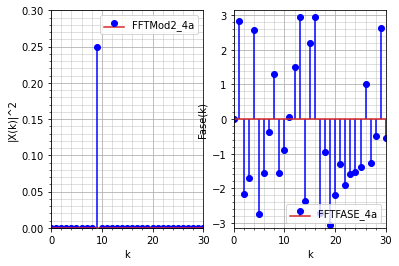

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,0.25,0.25,9
,,,
simulación,0.25,0.25,9


In [14]:
#######################################
# Tu simulación que genere resultados #
#######################################

a0 = 1 #Se coloca amplitud 1 por motivos de comparación con 4g. 1/np.sqrt(2) sería la amplitud para lograr potencia unitaria.
p0 = 0
desintonia = 0#Desintonia
df = fs/N # resolución espectral
f0 = (9*df)
dt = 1/fs

tt,y4a = generador_senoidal (fs, f0+desintonia, N, a0, p0)

ff = np.arange(0,N,df)
fft4a =scipy.fft.fft (y4a)
fftMod4a = np.abs(fft4a)/N
fftMod2_4a = fftMod4a**2

bfrec = ff <= fs/2
Etotal4a = np.sum(fftMod2_4a[bfrec])

Fpico4a=ff[np.argmax(fftMod2_4a)]

plt.figure(1)
fig4a, (modulo4a, fase4a) = plt.subplots(1,2)

modulo4a.axis([0,30,0,0.30])
modulo4a.minorticks_on()
modulo4a.grid(True,'minor',alpha=0.5)
modulo4a.grid(True)
modulo4a.stem(ff[bfrec], fftMod2_4a[bfrec], 'b','bo', label='FFTMod2_4a',use_line_collection=True) 
modulo4a.set(xlabel ='k',ylabel ='|X(k)|^2')
modulo4a.legend()

fase4a.axis([0,30,-np.pi,np.pi])
fase4a.minorticks_on()
fase4a.grid(True,'minor',alpha=0.5)
fase4a.grid(True)
fase4a.stem(ff[bfrec], np.angle(fft4a[bfrec]), 'b','bo', label='FFTFASE_4a',use_line_collection=True) 
fase4a.set(xlabel ='k',ylabel ='Fase(k)')
fase4a.legend()
plt.show()

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  [a0**2/4, a0**2/4,'9' ], # <-- completar acá
                  ['', '' , ''], 
                  [Etotal4a, fftMod2_4a[int(f0)], Fpico4a]  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./2.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.b) **1 solo ciclo** de la misma senoidal
				de **energía normalizada** y frecuencia $f_0 = 9 \cdot f_S/N$. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

<Figure size 432x288 with 0 Axes>

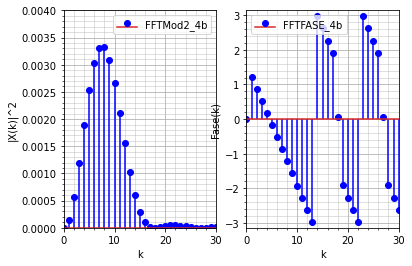

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,0.0277778,0.0277778,9
,,,
simulación,0.0277777,0.00308641,8


In [15]:
#######################################
# Tu simulación que genere resultados #
#######################################

tt4b = np.arange(0, (1/f0)-dt, dt)
y4b = a0 * np.sin (2*np.pi*f0*tt4b+p0)
y4bpad = np.pad( y4b, (0,int(N-len(tt4b))),'constant') #Generación de la señal solicitada completando 0 al final

fft4b =scipy.fft.fft (y4bpad)
fftMod4b = np.abs(fft4b)/N
fftMod2_4b = fftMod4b**2

Etotal4b = np.sum(fftMod2_4b[bfrec])

Fpico4b=ff[np.argmax(fftMod2_4b)]

plt.figure(1)
fig4b, (modulo4b, fase4b) = plt.subplots(1,2)

modulo4b.axis([0,30,0,0.004])
modulo4b.minorticks_on()
modulo4b.grid(True,'minor',alpha=0.5)
modulo4b.grid(True)
modulo4b.stem(ff[bfrec], fftMod2_4b[bfrec], 'b','bo', label='FFTMod2_4b',use_line_collection=True) 
modulo4b.set(xlabel ='k',ylabel ='|X(k)|^2')
modulo4b.legend()

fase4b.axis([0,30,-np.pi,np.pi])
fase4b.minorticks_on()
fase4b.grid(True,'minor',alpha=0.5)
fase4b.grid(True)
fase4b.stem(ff[bfrec], np.angle(fft4b[bfrec]), 'b','bo', label='FFTFASE_4b',use_line_collection=True) 
fase4b.set(xlabel ='k',ylabel ='Fase(k)')
fase4b.legend()
plt.show()


tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  [a0**2/(4*9), a0**2/(4*9), '9'], # <-- completar acá
                  ['', '', ''], 
                  [Etotal4b, fftMod2_4b[int(f0)] , Fpico4b]  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


Observe el resultado y compare sus resultados con el punto anterior. ¿Qué ha cambiado? ¿Cuánto vale la energía de un solo ciclo de senoidal respecto al caso anterior?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> La energía total es la novena parte de la calculada en el ejercicio 4a lo cual es coherente. Sin embargo se observa que producto de la nueva ventana introducida y su corresponidente DFT, la frecuencia pico está en 8 y no en 9. Esto se debe a que estamos en el extremos bajo de la banda digital, con la cual la convolución circular afecta severamente la componentes de baja frecuencia. Obervese también el desparramo espectral, ya que la energía no se encuentra concentrada en el bin coorespondiente a f0.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./3.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.c) 1 solo ciclo de la misma senoidal
				de energía normalizada y frecuencia $f_0 = 9 \cdot f_S/N$ **pero demorado un tiempo igual a dos ciclos**. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

<Figure size 432x288 with 0 Axes>

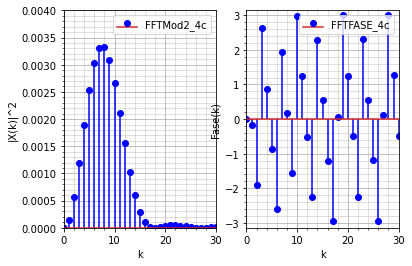

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,0.0277778,0.0277778,9
,,,
simulación,0.0277777,0.00308641,8


In [16]:
#######################################
# Tu simulación que genere resultados #
#######################################

y4cpad = np.pad( y4b, (2*len(tt4b),int(N-3*len(tt4b))),'constant') #Generación de la señal solicitada completando 0 al final y al principio

fft4c =scipy.fft.fft (y4cpad)
fftMod4c = np.abs(fft4c)/N
fftMod2_4c = fftMod4c**2

Etotal4c = np.sum(fftMod2_4c[bfrec])

Fpico4c=ff[np.argmax(fftMod2_4c)]

plt.figure(1)
fig4c, (modulo4c, fase4c) = plt.subplots(1,2)

modulo4c.axis([0,30,0,0.004])
modulo4c.minorticks_on()
modulo4c.grid(True,'minor',alpha=0.5)
modulo4c.grid(True)
modulo4c.stem(ff[bfrec], fftMod2_4c[bfrec], 'b','bo', label='FFTMod2_4c',use_line_collection=True) 
modulo4c.set(xlabel ='k',ylabel ='|X(k)|^2')
modulo4c.legend()

fase4c.axis([0,30,-np.pi,np.pi])
fase4c.minorticks_on()
fase4c.grid(True,'minor',alpha=0.5)
fase4c.grid(True)
fase4c.stem(ff[bfrec], np.angle(fft4c[bfrec]), 'b','bo', label='FFTFASE_4c',use_line_collection=True) 
fase4c.set(xlabel ='k',ylabel ='Fase(k)')
fase4c.legend()
plt.show()



tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  [a0**2/(4*9), a0**2/(4*9), '9'], # <-- completar acá
                  ['', '', ''], 
                  [Etotal4c, fftMod2_4c[int(f0)] , Fpico4c]  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


En este caso, ¿Qué ha cambiado respecto al anterior? ¿Cómo se manifiesta en el dominio frecuencial?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> El desplazamiento temporal de la señal se manifiesta como un cambio de fase en el dominio frecuencial. Considerar para lo gráficos de fase, que cuando el módulo tiende a cero, la información de fase de lo respecivos bins no tiene relevancia
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./4.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.d) 1 solo ciclo de la misma senoidal utilizada hasta ahora, y otro ciclo de idénticas características pero de $f_1 = 8 \cdot f_S/N$ y demorado aproximadamente como se observa a la izquierda. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

<Figure size 432x288 with 0 Axes>

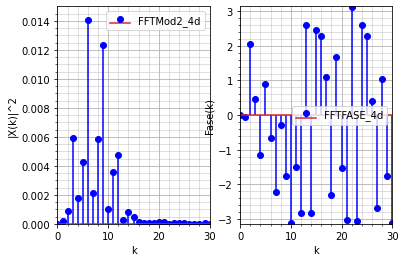

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,0.0590278,0.0277778,"8, 9"
,,,
simulación,0.0590265,0.0123078,6


In [17]:
#######################################
# Tu simulación que genere resultados #
#######################################
df = fs/N # resolución espectral
f1 = (8*df)

tt4d = np.arange(0, (1/f1)-dt, dt)
y4df1 = a0 * np.sin (2*np.pi*f1*tt4d+p0)
y4df0pad = np.pad(y4b,(0,2*len(tt4b)),'constant') #Generación del ciclo f0 completando 0 al final
y4df0padf1 = np.append(y4df0pad,y4df1)
y4dpad = np.pad(y4df0padf1,(0,N-len(y4df0padf1)),'constant')
    
fft4d =scipy.fft.fft (y4dpad)
fftMod4d = np.abs(fft4d)/N
fftMod2_4d = fftMod4d**2

Etotal4d = np.sum(fftMod2_4d[bfrec])

Fpico4d=ff[np.argmax(fftMod2_4d)]

plt.figure(1)
fig4d, (modulo4d, fase4d) = plt.subplots(1,2)

modulo4d.axis([0,30,0,0.015])
modulo4d.minorticks_on()
modulo4d.grid(True,'minor',alpha=0.5)
modulo4d.grid(True)
modulo4d.stem(ff[bfrec], fftMod2_4d[bfrec], 'b','bo', label='FFTMod2_4d',use_line_collection=True) 
modulo4d.set(xlabel ='k',ylabel ='|X(k)|^2')
modulo4d.legend()

fase4d.axis([0,30,-np.pi,np.pi])
fase4d.minorticks_on()
fase4d.grid(True,'minor',alpha=0.5)
fase4d.grid(True)
fase4d.stem(ff[bfrec], np.angle(fft4d[bfrec]), 'b','bo', label='FFTFASE_4d',use_line_collection=True) 
fase4d.set(xlabel ='k',ylabel ='Fase(k)')
fase4d.legend()
plt.show()



tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  [a0**2/(4*9)+a0**2/(4*8), a0**2/(4*9), '8, 9'], # <-- completar acá
                  ['', '', ''], 
                  [Etotal4d, fftMod2_4d[int(f0)] , Fpico4d]  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


¿Puede localizar ambas componentes en este espectro? ¿Cómo lo haría?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Intuituvamente si en el dominio temporal tenemos la misma cantidad de energía en 2 frecuencias distintas, se esperaría que en el dominio frecuencial la energía estuviera concentrada en los bins de dichas frecuencias. Esto no ocurre, ya que se observa desparramo espectral, y además observamos un pico del espectro para K = 6 frecuencia que en el dominio temporal no existe. Observando el gráfico de módulo se podría inferir es que la señal estaría compuesta por una componente de 9 Fs/N y otra en 6 Fs/N, lo cual resulta completamente falso. 
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./5.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.e) Idéntico al caso anterior salvo que se invierte la ocurrencia de las señales. </span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

<Figure size 432x288 with 0 Axes>

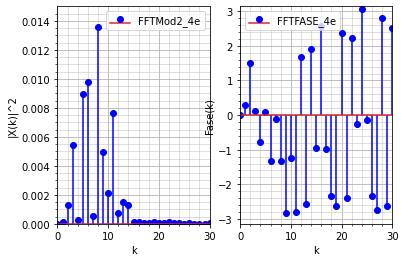

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,0.0590278,0.0277778,"8, 9"
,,,
simulación,0.0590265,0.00496047,8


In [18]:
#######################################
# Tu simulación que genere resultados #
#######################################

y4ef1pad = np.pad(y4df1,(0,2*len(tt4d)),'constant') #Generación del ciclo f0 completando 0 al final
y4ef1padf0 = np.append(y4ef1pad,y4b)
y4epad = np.pad(y4ef1padf0,(0,N-len(y4ef1padf0)),'constant')
    
fft4e =scipy.fft.fft (y4epad)
fftMod4e = np.abs(fft4e)/N
fftMod2_4e = fftMod4e**2

Etotal4e = np.sum(fftMod2_4e[bfrec])

Fpico4e=ff[np.argmax(fftMod2_4e)]

plt.figure(1)
fig4e, (modulo4e, fase4e) = plt.subplots(1,2)

modulo4e.axis([0,30,0,0.015])
modulo4e.minorticks_on()
modulo4e.grid(True,'minor',alpha=0.5)
modulo4e.grid(True)
modulo4e.stem(ff[bfrec], fftMod2_4e[bfrec], 'b','bo', label='FFTMod2_4e',use_line_collection=True) 
modulo4e.set(xlabel ='k',ylabel ='|X(k)|^2')
modulo4e.legend()

fase4e.axis([0,30,-np.pi,np.pi])
fase4e.minorticks_on()
fase4e.grid(True,'minor',alpha=0.5)
fase4e.grid(True)
fase4e.stem(ff[bfrec], np.angle(fft4e[bfrec]), 'b','bo', label='FFTFASE_4e',use_line_collection=True) 
fase4e.set(xlabel ='k',ylabel ='Fase(k)')
fase4e.legend()
plt.show()

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  [a0**2/(4*9)+a0**2/(4*8), a0**2/(4*9), '8, 9'], # <-- completar acá
                  ['', '', ''], 
                  [Etotal4e, fftMod2_4e[int(f0)] , Fpico4e]  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


¿ha cambiado el espectro respecto al caso anterior? ¿Si solo dispone del espectro, puede decir cuál ha ocurrido antes? ¿Resulta útil el análisis de espectral mediante la transformada de Fourier en este caso?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Si, se observan diferencias tanto en módulo como en la fase. Disponiendo solamente del espectro no es posible determinar qué componente ocurre primero en el dominio temporal. En este caso no es útil la FFT como herramienta de análisis y que nos daría una idea equivocada de la composición espectral de la señal bajo análisis. La proximidad de ambas componentes y su baja frecuencia tiene consecuencias negativas en este caso.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./6.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.f) Arme una señal como la que se muestra a la izquierda, concatenando 3 ciclos de $f_0 = 9 \cdot f_S/N$.</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

<Figure size 432x288 with 0 Axes>

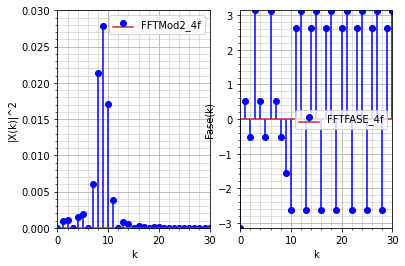

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,0.0833333,0.0833333,9
,,,
simulación,0.0833333,0.0277778,9


In [19]:
#######################################
# Tu simulación que genere resultados #
#######################################

tt4f = np.arange(0, 3/f0, dt)
y4f = a0 * np.sin (2*np.pi*f0*tt4f+p0)
y4fpad = np.pad( y4f, (0,int(N-len(tt4f))),'constant') #Generación de la señal solicitada completando 0 al final

fft4f =scipy.fft.fft (y4fpad)
fftMod4f = np.abs(fft4f)/N
fftMod2_4f = fftMod4f**2

Etotal4f = np.sum(fftMod2_4f[bfrec])

Fpico4f=ff[np.argmax(fftMod2_4f)]

plt.figure(1)
fig4f, (modulo4f, fase4f) = plt.subplots(1,2)

modulo4f.axis([0,30,0,0.03])
modulo4f.minorticks_on()
modulo4f.grid(True,'minor',alpha=0.5)
modulo4f.grid(True)
modulo4f.stem(ff[bfrec], fftMod2_4f[bfrec], 'b','bo', label='FFTMod2_4f',use_line_collection=True) 
modulo4f.set(xlabel ='k',ylabel ='|X(k)|^2')
modulo4f.legend()

fase4f.axis([0,30,-np.pi,np.pi])
fase4f.minorticks_on()
fase4f.grid(True,'minor',alpha=0.5)
fase4f.grid(True)
fase4f.stem(ff[bfrec], np.angle(fft4f[bfrec]), 'b','bo', label='FFTFASE_4f',use_line_collection=True) 
fase4f.set(xlabel ='k',ylabel ='Fase(k)')
fase4f.legend()
plt.show()





tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  [3*a0**2/(4*9), 3*a0**2/(4*9), '9'], # <-- completar acá
                  ['', '', ''], 
                  [Etotal4f, fftMod2_4f[int(f0)] , Fpico4f]  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


¿Qué energía tiene la componente $f_0$ en el espectro en comparación con la señal donde los 9 ciclos estaban presentes? ¿Y respecto a la que solo había 1 ciclo?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Para el caso de 1 ciclo la energía en f0 es 0.00308641, para el caso de 3 ciclos 0.0277778 y para 9 ciclos 0.25. Claramente observando el espectro se observa que en los casos de 1 y 3 ciclos, la energía no está concentrada en los bin K=9, con lo cual no se puese establecer una proporcionaldad entre la energía en el dominio temporal y el frecuencial observando solmente el bin correspondiente a f0. La proporcionalidad se cumple perfectamente si observamos la sumatoria de todas las componentes del espectro para cada caso. Allí se verifica que para 3 ciclos la energía total es 1/3 de los 9 ciclos, y par 1 ciclo, 1/9 de los 9 ciclos.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./7.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.g) Idem anterior, pero cada ciclo con amplitudes (1, 5, 3).</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

<Figure size 432x288 with 0 Axes>

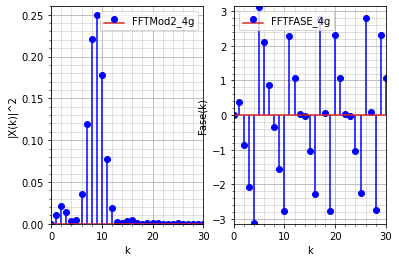

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,0.972222,0.972222,9
,,,
simulación,0.972221,0.249995,9


In [20]:
#######################################
# Tu simulación que genere resultados #
#######################################

a3 = 3
a5 = 5

y4g = np.append(y4b,a5*y4b)
y4g = np.append(y4g,a3*y4b)
y4gpad = np.pad( y4g, (0,int(N-len(y4g))),'constant')

fft4g =scipy.fft.fft (y4gpad)
fftMod4g = np.abs(fft4g)/N
fftMod2_4g = fftMod4g**2

Etotal4g = np.sum(fftMod2_4g[bfrec])

Fpico4g=ff[np.argmax(fftMod2_4g)]

plt.figure(1)
fig4g, (modulo4g, fase4g) = plt.subplots(1,2)

modulo4g.axis([0,30,0,0.26])
modulo4g.minorticks_on()
modulo4g.grid(True,'minor',alpha=0.5)
modulo4g.grid(True)
modulo4g.stem(ff[bfrec], fftMod2_4g[bfrec], 'b','bo', label='FFTMod2_4g',use_line_collection=True) 
modulo4g.set(xlabel ='k',ylabel ='|X(k)|^2')
modulo4g.legend()

fase4g.axis([0,30,-np.pi,np.pi])
fase4g.minorticks_on()
fase4g.grid(True,'minor',alpha=0.5)
fase4g.grid(True)
fase4g.stem(ff[bfrec], np.angle(fft4g[bfrec]), 'b','bo', label='FFTFASE_4g',use_line_collection=True) 
fase4g.set(xlabel ='k',ylabel ='Fase(k)')
fase4g.legend()
plt.show()


tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  [a0**2/(4*9)+a5**2/(4*9)+a3**2/(4*9), a0**2/(4*9)+a5**2/(4*9)+a3**2/(4*9), '9'], # <-- completar acá
                  ['', '', ''], 
                  [Etotal4g, fftMod2_4g[int(f0)] , Fpico4g]  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


¿Qué energía tiene la componente $f_0$ en el espectro en comparación con el inciso anterior?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> En el caso anterior la energía en f0 es 0.0277778 (3 ciclos de amplitud unitaria), en este caso es 0.249995 es decir 9 veces mayor.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./8.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.h) Idem patrón anterior, pero repetido 3 veces.</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

<Figure size 432x288 with 0 Axes>

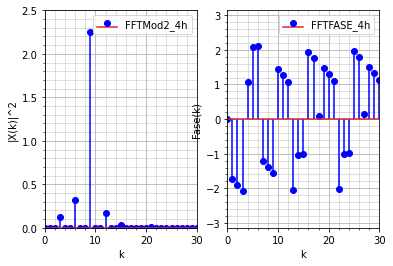

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,2.91667,2.91667,9
,,,
simulación,2.91666,2.24943,9


In [21]:
#######################################
# Tu simulación que genere resultados #
#######################################

y4h = np.append(y4g,y4g)
y4h = np.append(y4h,y4g)
y4hpad = np.pad(y4h,(0,1),'constant') # Se completa 1 muestra al final con 0 para cumplir N=1000


fft4h =scipy.fft.fft (y4hpad)
fftMod4h = np.abs(fft4h)/N
fftMod2_4h = fftMod4h**2

Etotal4h = np.sum(fftMod2_4h[bfrec])

Fpico4h=ff[np.argmax(fftMod2_4h)]

plt.figure(1)
fig4h, (modulo4h, fase4h) = plt.subplots(1,2)

modulo4h.axis([0,30,0,2.5])
modulo4h.minorticks_on()
modulo4h.grid(True,'minor',alpha=0.5)
modulo4h.grid(True)
modulo4h.stem(ff[bfrec], fftMod2_4h[bfrec], 'b','bo', label='FFTMod2_4h',use_line_collection=True) 
modulo4h.set(xlabel ='k',ylabel ='|X(k)|^2')
modulo4h.legend()

fase4h.axis([0,30,-np.pi,np.pi])
fase4h.minorticks_on()
fase4h.grid(True,'minor',alpha=0.5)
fase4h.grid(True)
fase4h.stem(ff[bfrec], np.angle(fft4h[bfrec]), 'b','bo', label='FFTFASE_4h',use_line_collection=True) 
fase4h.set(xlabel ='k',ylabel ='Fase(k)')
fase4h.legend()
plt.show()

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  [3*(a0**2/(4*9)+a5**2/(4*9)+a3**2/(4*9)), 3*(a0**2/(4*9)+a5**2/(4*9)+a3**2/(4*9)), '9'], # <-- completar acá
                  ['', '', ''], 
                  [Etotal4h, fftMod2_4h[int(f0)] , Fpico4h]  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


¿Qué energía tiene la componente $f_0$ en el espectro en comparación con el inciso anterior? ¿Y respecto al que estaban los 9 ciclos presentes pero con la misma amplitud?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> En el caso anterior la energía en f0 es 0.249995 (3 ciclos de amplitud 1,3 y 5), en este caso es de 2.24943, es decir 9 veces mas. En el caso de los 9 ciclos con la misma amplitud la energía en f0 es 0.25 es decir que también tenemos 9 veces mas energía.
</div>

<table width="80%" cellpadding="7" cellspacing="0">
	<col width="50%">
	<col width="50%">
	<tbody>
		<tr valign="top">
			<td width="296" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding: 0cm">
				<p>
                    <img src="./9.png" align="left" width="100%" /> 
                </p>
			</td>
			<td width="267" style="border-top: none; border-bottom: none; border-left: none; border-right: none; padding-top: 0cm; padding-bottom: 0cm; padding-left: 0.19cm; padding-right: 0cm">
				<p style="margin-bottom: 0cm"><span lang="es-AR">4.i) En este caso genere un ciclo de $f_0 = 9 \cdot f_S/N$, y seguido otro ciclo pero desfasado $\pi$ radianes.</span></font>
				</p>
			</td>
		</tr>
	</tbody>
</table>
        

<Figure size 432x288 with 0 Axes>

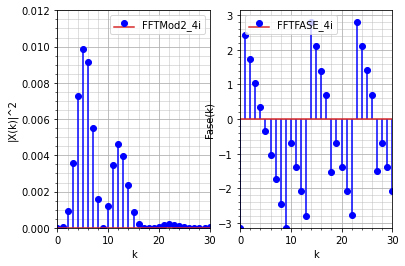

,Energía total,Energía en $f_0$,Máximo de Energía
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$,$ \lvert X(f_0) \rvert ^2 $,$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $
,,,$f \in [0:f_S/2]$
,,,
predicción,0.0555556,0.0555556,9
,,,
simulación,0.0555555,1.21846e-07,5


In [22]:
#######################################
# Tu simulación que genere resultados #
#######################################

y4i=np.append(y4b,-y4b)
y4ipad = np.pad( y4i, (0,int(N-len(y4i))),'constant')

fft4i =scipy.fft.fft (y4ipad)
fftMod4i = np.abs(fft4i)/N
fftMod2_4i = fftMod4i**2

Etotal4i = np.sum(fftMod2_4i[bfrec])

Fpico4i=ff[np.argmax(fftMod2_4i)]

plt.figure(1)
fig4i, (modulo4i, fase4i) = plt.subplots(1,2)

modulo4i.axis([0,30,0,0.012])
modulo4i.minorticks_on()
modulo4i.grid(True,'minor',alpha=0.5)
modulo4i.grid(True)
modulo4i.stem(ff[bfrec], fftMod2_4i[bfrec], 'b','bo', label='FFTMod2_4i',use_line_collection=True) 
modulo4i.set(xlabel ='k',ylabel ='|X(k)|^2')
modulo4i.legend()

fase4i.axis([0,30,-np.pi,np.pi])
fase4i.minorticks_on()
fase4i.grid(True,'minor',alpha=0.5)
fase4i.grid(True)
fase4i.stem(ff[bfrec], np.angle(fft4i[bfrec]), 'b','bo', label='FFTFASE_4i',use_line_collection=True) 
fase4i.set(xlabel ='k',ylabel ='Fase(k)')
fase4i.legend()
plt.show()
tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert X(f) \rvert ^2$', '$ \lvert X(f_0) \rvert ^2 $', '$ \mathop{arg\ max}_f \{\lvert X(f) \rvert ^2\} $'], 
                   ['',                                     '',                           '$f \in [0:f_S/2]$'], 
                  ['', '', ''], 
                  [2*a0**2/(4*9), 2*a0**2/(4*9), '9'], # <-- completar acá
                  ['', '', ''], 
                  [Etotal4i, fftMod2_4i[int(f0)] , Fpico4i]  # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía en $f_0$', 'Máximo de Energía'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '', 
                      'predicción', 
                      '', 
                      'simulación'])
HTML(df.to_html())


¿Qué energía tiene la componente $f_0$ en el espectro en comparación con el que estaba un solo ciclo presente?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> La energía en f0 es prácticamente nula. Si bien se esperaría que exista el doble de energía en el dominio de la frecuencia por tener el doble de energía en el dominio del tiempo, por la relación de fases entre las componentes analizadas se observa que al realizar la FFT se anula el espectro en f0.
</div>

Luego de realizar la experimentación y observando los resultados obtenidos discuta si es fiable o no medir en el dominio de Fourier, por medio de la FFT los siguientes aspectos de una señal:

    • Energía
    • Contenido espectral
    • Energía de un determinado ancho de banda o componente espectral
    • Localización temporal de un determinado componente espectral.

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> En cuanto a la energía total se puede decir que la FFT es fiable en sus resultados, es decir que siempre se cumple le Relación de Parseval.
    En cuanto al contenido espectral, la información no es fiable, ya que depende de la cercanía con la frecuencia de Nyquist Fs/2 o de la frecuencia 0 como afecta la convolución circular al espectro de la señal a analizar. Pueden darse casos en los que la FFT exhiba componentes que en el dominio temporal no existan y viceversa.
    En cuanto a la energía en un determinado ancho de banda podemos decir que la información de la FFT es fiable. Según el tipo de ventana rectangular que se utilice será la concentración  de la energía en las frecuencias de interés.
    La localización temporal de un determinado componente espectral, se manifestado en la fase que la FFT arroja del mismo. 
</div>

<div class="alert alert-block alert-info">
<b>5)</b> 
Simule el efecto de cuantizar una señal continua en el tiempo mediante un conversor analógico digital (ADC).
</div>

Para ello analice señales determinísticas, por ejemplo una senoidal de **energía normalizada** y frecuencia $f_0$, y otras que varíen de forma más aleatoria y por lo tanto, representativa de una señal real, por ejemplo añadiendo ruido. Es decir que la señal *real* simulada será 

$$s_R = s + n$$

donde la señal $n$ debe tener una energía de $1/10$.
           
Puede simular una señal continua (aproximadamente para los fines prácticos), mediante una señal muestreada a una $f^1_S$ muy alta en comparación con las $f_S$  que quiere estudiar, y un tipo de dato de doble precisión (double o float de 64 bits). De esta manera se asegura una grilla de cuantización (en tiempo y amplitud) mucho más densa que la que se va a simular. Se pide cuantizar a palabras de 4, 8 y 16 bits, obteniendo

$$ s_Q = \mathop{Q}_i \{s_R\} \quad i \in (4, 8, 16) $$

Siendo $\mathop{Q}_i$ la función **no lineal** responsable de la cuantización a *i-* bits de la señal real $s_R$. Describa el ruido de cuantización 

$$ e = s_Q - s_R$$

para las 3 situaciones antedichas siguiendo las siguientes consignas.
     


<div class="alert alert-block alert-info">
<b>5.a)</b> 
La señal temporal $e$ y su espectro $E$.
</div>

,Energía total,Energía total Q,Energía total $e$
$f_0$ \ expr. matemática,$\sum_{f=0}^{f_S/2} \lvert S_R(f) \rvert ^2$,$\sum_{f=0}^{f_S/2} \lvert S_Q(f) \rvert ^2$,$\sum_{f=0}^{f_S/2} \lvert e(f) \rvert ^2$
,,,
4 bits,0.125266,0.128255,0.00167753
8 bits,0.125266,0.125179,4.91685e-06
16 bits,0.125266,0.125266,8.23958e-11


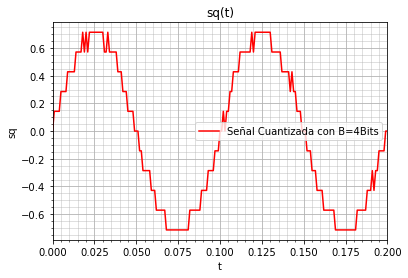

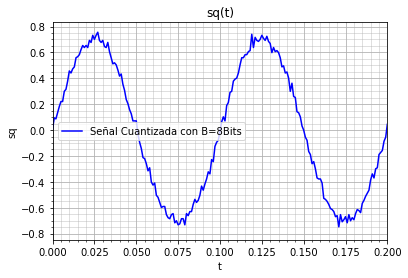

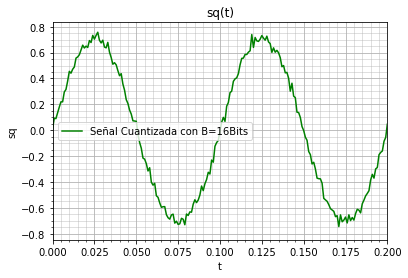

In [35]:
#######################################
# Tu simulación que genere resultados #
#######################################

a0 = 1/np.sqrt(2)
p0 = 0
desintonia = 0 #Desintonia
df = fs/N # resolución espectral
#f0 = (N/4*df)
f0 = 10
dt = 1/fs
Vref = 1
B=8
B1=4
B2=8
B3=16


tt,senial = generador_senoidal (fs, f0+desintonia, N, a0, p0)

ruido = np.random.normal(0,(a0**2)/20,N)
#ruido = 0
muestras = []

def my_ADC (senial, B, Vref):
    
    q = Vref/(2**(B-1)-1)
    valor = senial/q 
    muestras=np.rint(valor)    
    
    return muestras

sr = senial + ruido

sq1=my_ADC(sr,B1,Vref)  #senial digitalizada con distintas resoluciones
sq2=my_ADC(sr,B2,Vref)
sq3=my_ADC(sr,B3,Vref)

q1 = Vref/(2**(B1-1)-1)
q2 = Vref/(2**(B2-1)-1)
q3 = Vref/(2**(B3-1)-1)


eq1 = sr/q1 - sq1
eq2 = sr/q2 - sq2
eq3 = sr/q3 - sq3

ff = np.arange(0,N,df)
bfrec = ff <= fs/2

fftsr =scipy.fft.fft(sr)
fftModsr = np.abs(fftsr)/N
fftMod2_sr = fftModsr**2
Etotalsr = np.sum(fftMod2_sr[bfrec])

fftsq1 =scipy.fft.fft(sq1)
fftModsq1 = np.abs(fftsq1)/(N/q1)
fftMod2_sq1 = fftModsq1**2
Etotalsq1 = np.sum(fftMod2_sq1[bfrec])
Etotaleq1 = np.sum((eq1*q1)**2)/N

fftsq2 =scipy.fft.fft(sq2)
fftModsq2 = np.abs(fftsq2)/(N/q2)
fftMod2_sq2 = fftModsq2**2
Etotalsq2 = np.sum(fftMod2_sq2[bfrec])
Etotaleq2 = np.sum((eq2*q2)**2)/N

fftsq3 =scipy.fft.fft(sq3)
fftModsq3 = np.abs(fftsq3)/(N/q3)
fftMod2_sq3 = fftModsq3**2
Etotalsq3 = np.sum(fftMod2_sq3[bfrec])
Etotaleq3 = np.sum((eq3*q3)**2)/N

plt.figure(1)
plt.minorticks_on()
plt.xlim(0,0.2)
plt.grid(True,'minor',alpha=0.5)
plt.grid(True)
plt.plot(tt, sq1*q1, 'r', label='Señal Cuantizada con B=4Bits')  # etc.
plt.xlabel('t')
plt.ylabel('sq')
plt.title("sq(t)")
plt.legend()

plt.figure(2)
plt.minorticks_on()
plt.xlim(0,0.2)
plt.grid(True,'minor',alpha=0.5)
plt.grid(True)
plt.plot(tt, sq2*q2, 'b', label='Señal Cuantizada con B=8Bits')  # etc.
plt.xlabel('t')
plt.ylabel('sq')
plt.title("sq(t)")
plt.legend()

plt.figure(3)
plt.minorticks_on()
plt.xlim(0,0.2)
plt.grid(True,'minor',alpha=0.5)
plt.grid(True)
plt.plot(tt, sq3*q3, 'g', label='Señal Cuantizada con B=16Bits')  # etc.
plt.xlabel('t')
plt.ylabel('sq')
plt.title("sq(t)")
plt.legend()

tus_resultados = [ ['$\sum_{f=0}^{f_S/2} \lvert S_R(f) \rvert ^2$', '$\sum_{f=0}^{f_S/2} \lvert S_Q(f) \rvert ^2$', '$\sum_{f=0}^{f_S/2} \lvert e(f) \rvert ^2$' ], 
                   ['',                                             '',                                             ''                              ], 
                   [Etotalsr,Etotalsq1, Etotaleq1], # <-- completar acá
                   [Etotalsr,Etotalsq2, Etotaleq2], # <-- completar acá
                   [Etotalsr,Etotalsq3, Etotaleq3], # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Energía total', 'Energía total Q', 'Energía total $e$'],
               index=['$f_0$ \ expr. matemática', 
                      '', 
                      '4 bits', 
                      '8 bits', 
                      '16 bits'
                      ])
HTML(df.to_html())


<div class="alert alert-block alert-info">
<b>5.b)</b> El histograma de la señal $e_i$ para cada tamaño de palabra.
</div>

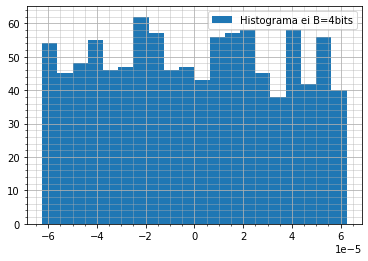

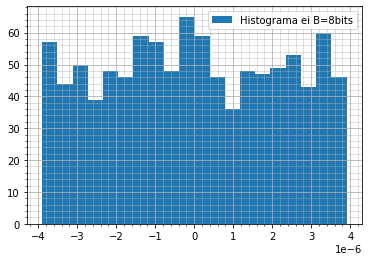

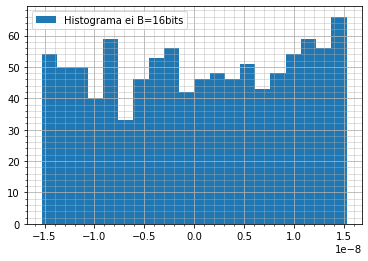

In [24]:
#####################################
# Tu simulación que genere gráficas #
#####################################

plt.figure(1)
plt.minorticks_on()
plt.grid(True,'minor',alpha=0.5)
plt.grid(True)
plt.hist(eq1/(N*2**(B1-1)),20,label='Histograma ei B=4bits')
plt.legend()

plt.figure(2)
plt.minorticks_on()
plt.grid(True,'minor',alpha=0.5)
plt.grid(True)
plt.hist(eq2/(N*2**(B2-1)),20,label='Histograma ei B=8bits')
plt.legend()

plt.figure(3)
plt.minorticks_on()
plt.grid(True,'minor',alpha=0.5)
plt.grid(True)
plt.hist(eq3/(N*2**(B3-1)),20,label='Histograma ei B=16bits')
plt.legend()

¿Qué información podemos obtener de esta forma de analizar la señal $e_i$?

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Se puede observar que el error de cuantización presenta una distribución uniforme sin importar la cantidad de bits del ADC, no se observan sesgos. Sí  es evidente que a mayor resolución del conversor analógio digital el error de cuantización disminuye por lo tanto las barras de los histogramas se concentran en un entorno mas pequeño. 
</div>

<div class="alert alert-block alert-info">
<b>5.c)</b> Una descripción de la señal $e_i$, por medio del **valor medio**, su valor **RMS** y su energía **energía**
</div>

In [25]:
#######################################
# Tu simulación que genere resultados #
#######################################

eq1Med = np.sum(eq1*q1)/N
eq2Med = np.sum(eq2*q2)/N
eq3Med = np.sum(eq3*q3)/N

eq1RMS = np.sqrt(np.sum((eq1*q1)**2)/N)
eq2RMS = np.sqrt(np.sum((eq2*q2)**2)/N)
eq3RMS = np.sqrt(np.sum((eq3*q3)**2)/N)


tus_resultados = [ 
                   [eq1Med,eq1RMS,Etotaleq1], # <-- completar acá
                   [eq2Med,eq2RMS,Etotaleq2], # <-- completar acá
                   [eq3Med,eq3RMS,Etotaleq3], # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Valor medio', 'RMS', 'Energía'],
               index=[
                      '4 bits', 
                      '8 bits', 
                      '16 bits'
                      ])
HTML(df.to_html())


,Valor medio,RMS,Energía
4 bits,-8.354790e-04,0.040706,1.657006e-03
8 bits,-8.707396e-06,0.002255,5.083862e-06
16 bits,4.534437e-07,0.000009,8.269533e-11


<div class="alert alert-block alert-info">
<b>5.d)</b> Una descripción **estadística** de la señal $e_i$, por medio de su **media**, su **desvío estándard** y su energía **varianza**.
</div>

In [26]:
#######################################
# Tu simulación que genere resultados #
#######################################

eq1Media = np.mean(eq1*q1)
eq2Media = np.mean(eq2*q2)
eq3Media = np.mean(eq3*q3)

eq1Var = np.var(eq1*q1)
eq2Var = np.var(eq2*q2)
eq3Var = np.var(eq3*q3)

eq1DesStd = np.std(eq1*q1)
eq2DesStd = np.std(eq2*q2)
eq3DesStd = np.std(eq3*q3)


tus_resultados = [ 
                   [eq1Media, eq1DesStd, eq1Var], # <-- completar acá
                   [eq2Media, eq2DesStd, eq2Var], # <-- completar acá
                   [eq3Media, eq3DesStd, eq3Var], # <-- completar acá
                 ]
df = DataFrame(tus_resultados, columns=['Media', 'Desvío estándard', 'Varianza'],
               index=[
                      '4 bits', 
                      '8 bits', 
                      '16 bits'
                      ])
HTML(df.to_html())


,Media,Desvío estándard,Varianza
4 bits,-8.354790e-04,0.040698,1.656308e-03
8 bits,-8.707396e-06,0.002255,5.083787e-06
16 bits,4.534437e-07,0.000009,8.248972e-11


Discutir las similitudes y diferencias con los parámetros calculados en **c)** y **d)**. 

<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Comparando los puntos c) y d) se observa claramente la igualdad numércia entre valor medio y media aritmética de la señal $e_i$, asimismo son muy similares los resultados entre Valor cuadrático medio (RMS) y Desvío estándard, y entre Energía y Varianza. Esto se debe a que las expresiones para cada par de valores mecionados coinciden en cuanto a su definición para un señal discreta como es el caso de $e_i$ cuando su valor mas probable es cercano a 0.
</div>

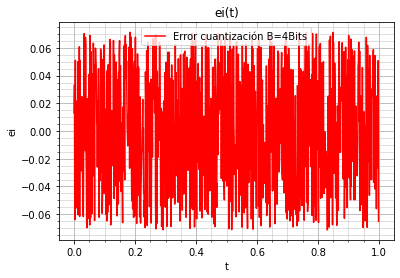

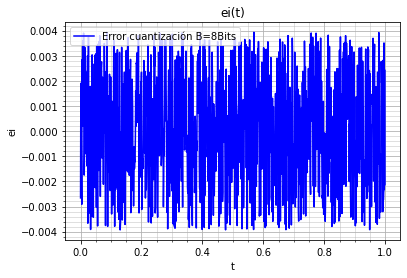

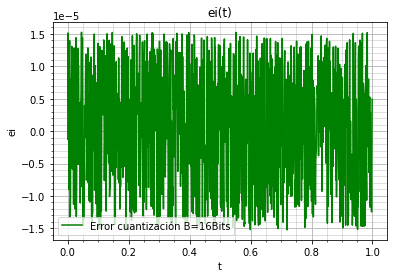

In [30]:
plt.figure(1)
plt.minorticks_on()
plt.grid(True,'minor',alpha=0.5)
plt.grid(True)
plt.plot(tt, eq1*q1, 'r', label='Error cuantización B=4Bits')  # etc.
plt.xlabel('t')
plt.ylabel('ei')
plt.title("ei(t)")
plt.legend()

plt.figure(2)
plt.minorticks_on()
plt.grid(True,'minor',alpha=0.5)
plt.grid(True)
plt.plot(tt, eq2*q2, 'b', label='Error cuantización B=8Bits')  # etc.
plt.xlabel('t')
plt.ylabel('ei')
plt.title("ei(t)")
plt.legend()

plt.figure(3)
plt.minorticks_on()
plt.grid(True,'minor',alpha=0.5)
plt.grid(True)
plt.plot(tt, eq3*q3, 'g', label='Error cuantización B=16Bits')  # etc.
plt.xlabel('t')
plt.ylabel('ei')
plt.title("ei(t)")
plt.legend()
